# Стандартная форма записи уравнения звена



<p>
    Рассмотрим систему с одномерным входом и одномерным выходом, которая описывается линейным дифференциальным уравнением. Чтобы облегчить анализ системы, уравнение записывается так, чтобы сигнал на выходе объекта и его производные находились в левой части уравнения, а остальные члены &mdash; в правой части. Кроме того, принято, чтобы сам сигнал на выходе имел в уравнении коэффициент равный единице.
</p>

<p>
    Таким образом, стандартное линейное уравнение звена имеет вид
    $$
        \sum_{i=0}^n T_i \frac{\mathrm{d}^i x}{\mathrm{d} t^i}(t) = \sum_{j=0}^m k_j \frac{\mathrm{d}^j u}{\mathrm{d} u^j}(t) + k_{m+1} f(t),\quad T_0 = 0, \tag{1}
    $$
    где $x$ &mdash; выход системы, $u$ &mdash; управляющее воздействие, а функция $f(t)$ характеризует возмущения. Коэффициенты $k_0, \ldots, k_{m+1}$, называются <b>коэффициентами передачи</b>, а $T_0, \ldots, T_n$ &mdash; <b>постоянными времени</b>.</p> 
<p>  
        Термин "коэффициент передачи" можно пояснить следующим образом. На вход звена подадим сигнал $u = const$ при условии, что $f(t) \equiv 0$. Тогда уравнение $(1)$ имеет решение $x = k_0 u$. Поэтому коэффициент $k_0$ представляет собой отношение сигнала на выходе к сигналу на входе в установившемся режиме.</p>
    

# Типы звеньев систем управления
 Все звенья делятся на три большие группы:
 
1. позиционные 
2. интегрирующие
2. дифференцирующие

    
Рассмотрим каждую из групп подробнее.

## Позиционные звенья

<p>Звенья такого типа описываются дифференциальным уравнением $(1)$, в правой части которого $m = 0$. Рассмотрим следующие примеры таких звеньев:
<ol>
    <li> безинерционное (пропорциональное) звено $(n=0)$
        $$x = ku \tag{2.1}$$ 
    </li>
    <li> инерционное (апериодическое) звено $(n=1)$
        $$T \dot{x} +x = ku \tag{2.2}$$
    </li>
</ol>
</p>

<p>Построим для каждого из этих звеньев передаточную, весовую и переходную функции при помощи библиотеки символьных вычислений Sympy.</p>

### Пропорциональное звено

In [1]:
# импортируем необходимые библиотеки
import sympy
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math

In [2]:
# функции для удобного отображения равенств
def dispStr(s):
    return display(Math("$"+s+"$"))
def dispEq(left, right):
    return display(Math("$"+left+'='+right+"$"))
def makelatex(sym):
    return sympy.latex(sym)

In [3]:
# функции для часто повторяющихся действий
# применение преобразования Лапласа к уравнению
def LEq(Left, Right):
    return sympy.Eq(L(Left), L(Right))

# решение полученного уравнения относительно изображения x(t)
def LSolve(LEq):
    return sympy.solve(LEq, L(x))[0]

# передаточная функция
def H(LSol):
    return sympy.simplify(LSol/L(u))

# весовая функция
def h(H):
    return iL(H)

# переходная функция
def pi(H):
    return iL(H/s)

In [4]:
def lambdify(expr, subs):
    """Преобразует символьную функцию expr(t) аргумента t в числовую с заменой параметров на соответствующие
    им значения из subs"""
    
    return np.vectorize(lambda arg : float(expr.evalf(subs=dict(list(zip(subs.keys(), subs.values()))+[(t, arg)]))))

In [5]:
# Функция для построения графиков символьных функций с разничными параметрами в одних осях
def plot_sym(expr, subs_list, ax, ls, labels):
    for subs in subs_list:
        ax.plot(ls, lambdify(expr, subs)(ls))
    ax.grid()
    ax.legend(labels)


In [6]:
# t, s и k - действительные символьные переменные
t, s, k = sympy.symbols("t, s, k", real=True)

# x(t), u(t) - действительные символьные функции переменой t
x = sympy.Function("x", real=True)(t)
u = sympy.Function("u", real=True)(t)

In [7]:
# функции для прямого и обратного преобразования Лапласа
def L(x):
    return sympy.laplace_transform(x, t, s, noconds=True)

def iL(X):
    return sympy.inverse_laplace_transform(X, s, t)

Определим уравнение $(2.1)$

In [8]:
# левая часть
Left21 = x
# правая часть
Right21 = k*u
# уравнение
dispEq(makelatex(Left21),makelatex(Right21))

<IPython.core.display.Math object>

Применим к обеим частям преобразование Лапласа

In [9]:
LEq21 = LEq(Left21, Right21)
LEq21

Eq(LaplaceTransform(x(t), t, s), k*LaplaceTransform(u(t), t, s))

и решим его относительно $L \left[ x(t) \right]$:

In [10]:
Sol21 = LSolve(LEq21)
dispEq(makelatex(L(x)), makelatex(Sol21))

<IPython.core.display.Math object>

По определению <b>передаточная функция</b> &mdash; имеющее наименьший порядок отношение изображений выходной и входной переменных при нулевых начальных условиях:


In [11]:
H21 = H(Sol21)
dispEq("\mathsf{H}_{(2.1)}(s)",makelatex(H21))

<IPython.core.display.Math object>

<p>
<b>Весовой функцией</b> $h(t)$ называется отклик системы на единичное импульсное воздействие ($\delta$-функцию) при нулевых начальных условиях.
</p>

<p>
Найдём весовую функцию пропорционального звена, учитывая, что $\mathcal{L}\left[\delta(t)\right](s) \equiv 1$ и, следовательно, $\mathsf{X}(s) \equiv \mathsf{H}(s)$.
</p>

In [12]:
h21 = h(H21)
dispEq("h_{(2.1)}(t)",makelatex(h21))

<IPython.core.display.Math object>

<p>
<b>Переходной функцией</b> $\pi(t)$ называется отклик системы на единичное ступенчатое воздействие ($\theta(t)$ - функция Хевисайда) при нулевых начальных условиях.
</p>

<p>
    Найдём переходную функцию пропорционального звена, учитывая что $\mathcal{L}\left[\theta(t)\right](s) = \frac{1}{s}$.
</p>

In [13]:
pi21 = pi(H21)
dispEq("\pi_{(2.1)}(t)",makelatex(pi21))

<IPython.core.display.Math object>

Таким образом, откликом пропорционального звена на любой воздействие является сигнал, пропорциональный воздействию с коэффициентом $k$.

#### Физичные примеры пропорционального звена

Примерами пропорционального звена могут служить: рычаг, зубчатая передача, делитель напряжений.

<b>1) рычаг</b>

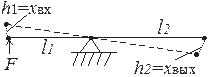
<center>Рис. 1.1</center>


Перемещение $h_2$ (рис 1.1) зависит от соотношения плеч рычага $l_1$ и $l_2$ и величины входного перемещения $h_1$
$$
h_2(h_1) = \frac{l_2}{l_1} = k_р h_1
$$
$
k_р=\frac{l_2}{l_1}$ &mdash; коэффициент передачи.


<b>2) зубчатая передача</b>

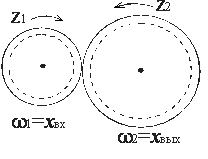
<center>Рис. 1.2</center>

Угловая скорость зубчатой передачи $w_2$ (рис. 1.2) зависит от соотношения числа зубьев на малой и большой шестернях $z_1$ и $z_2$ и величины угловой скорости малой шестерни $w_1$
$$
\omega_2 = \frac{z_1}{z_2}\omega_1 =k_п \omega_1
$$
$k_п=\frac{z_2}{z_1}$ &mdash; коэффициент передачи.

<b>3) делитель напряжений</b>

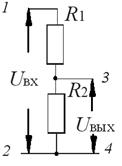
<center>Рис. 1.3</center>

Выходное напряжение $U_вых$ (рис. 1.3) зависит от соотношения сопротивлений электрической цепочки $R_1$ и $R_2$ и величины входного напряжения $U_вх$
$$
U_вых =\frac{R_2}{R_1+R_2}U_вх = k_д U_вх
$$
$k_д=\frac{R_2}{R_1+R_2}$ &mdash; коэффициент передачи.

### Апериодическое звено

In [14]:
# действительная постоянная символьная переменная T
T = sympy.Symbol('T', real=True, const=True)

Определим уравнение (2.2)

In [15]:
# левая часть
Left22 = T*x.diff(t) + x
# правая часть
Right22 = k*u
# уравнение
dispEq(makelatex(Left22), makelatex(Right22))

<IPython.core.display.Math object>

Применим к обеим частям преобразование Лапласа

In [16]:
LEq22 = LEq(Left22, Right22)
LEq22

Eq(T*LaplaceTransform(Derivative(x(t), t), t, s) + LaplaceTransform(x(t), t, s), k*LaplaceTransform(u(t), t, s))

<p>
По одному из свойств преобразования Лапласа
$$
    \mathcal{L}\left[ \frac{\mathrm{d}^n x}{\mathrm{d}t^n}(t) \right](s) = s^n \mathcal{L}\left[x(t) \right](s) - \sum_{i=1}^{n} s^{i-1} x^{(n-i)}(0) = s^n \mathcal{L}\left[x(t) \right](s) $$
   при  $x^{m}(0)=0; \space m = 1\ldots n-1$
    
Учтём это, произведя замену в полученных символьных выражениях.

In [17]:
# составляем массив из пар (изображение n-ой производной x(t), s^n*изображение x(t)), то же и для u(t)
subl = [(L(sympy.diff(x,(t,i))), s**i*L(x)) for i in range(3)] + [(L(sympy.diff(u,(t,i))), s**i*L(u)) for i in range(3)]
subl

[(LaplaceTransform(x(t), t, s), LaplaceTransform(x(t), t, s)),
 (LaplaceTransform(Derivative(x(t), t), t, s), s*LaplaceTransform(x(t), t, s)),
 (LaplaceTransform(Derivative(x(t), (t, 2)), t, s),
  s**2*LaplaceTransform(x(t), t, s)),
 (LaplaceTransform(u(t), t, s), LaplaceTransform(u(t), t, s)),
 (LaplaceTransform(Derivative(u(t), t), t, s), s*LaplaceTransform(u(t), t, s)),
 (LaplaceTransform(Derivative(u(t), (t, 2)), t, s),
  s**2*LaplaceTransform(u(t), t, s))]

In [18]:
# функция для замены в соответствии со свойством выше
def LSubs(LEq):
    return sympy.together(LEq.subs(subl))

In [19]:
#Произведём замену в уравнении и приведём подобные
LEq22 = LSubs(LEq22)
LEq22

Eq((T*s + 1)*LaplaceTransform(x(t), t, s), k*LaplaceTransform(u(t), t, s))

Решим уравнение относительно $L \left[ x(t) \right]$:

In [20]:
Sol22 = LSolve(LEq22)
dispEq(makelatex(L(x)), makelatex(Sol22))

<IPython.core.display.Math object>

Найдём передаточную функцию апериодического звена $\mathsf{H}_{(2.2)}(s)$:


In [21]:
H22 = H(Sol22)
dispEq('\mathsf{H}_{(2.2)}(s)',makelatex(H22))

<IPython.core.display.Math object>

<p>
Найдём весовую функцию, учитывая, что $\mathcal{L}\left[\delta(t)\right](s) \equiv 1$ и, следовательно, $\mathsf{X}(s) \equiv \mathsf{H}(s)$:
</p>

In [22]:
h22 = h(H22)
dispEq('h_{(2.2)}(t)', makelatex(h22))

<IPython.core.display.Math object>

<p>
    Построим её график при $k=1$ и целых значениях $T \in [1,5]$:
</p>

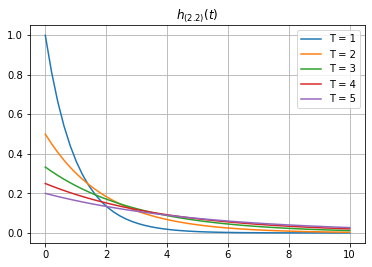

In [23]:
N = 6
subs_list = [{k:1, T:i} for i in range(1,N)]
labels = ['T = '+str(i) for i in range(1,N)]
ls = np.linspace(0.0001, 10)
fig, ax = plt.subplots()
ax.set_title('$h_{(2.2)}(t)$')
plot_sym(h22, subs_list, ax, ls, labels)





<p>
    Найдём переходную функцию, учитывая, что $\mathcal{L}\left[\theta(t)\right](s) = \frac{1}{s}$:
</p>

In [24]:
pi22 = pi(H22)
dispEq('\pi_{(2.2)}(t)',makelatex(pi22)) 

<IPython.core.display.Math object>

<p>
    Построим её график при $k=1$ и целых значениях $T \in [1,5]$:
</p>

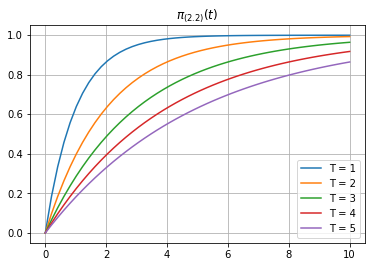

In [25]:
N = 6
subs_list = [{k:1, T:i} for i in range(1,N)]
labels = ['T = '+str(i) for i in range(1,N)]
ls = np.linspace(0.0001, 10)
fig, ax = plt.subplots()
ax.set_title('$\pi_{(2.2)}(t)$')
plot_sym(pi22, subs_list, ax, ls, labels)


#### Физичные примеры апериодического звена

Примерами апериодического звена являются пассивные R-L или R−C цепочки:

<b>1) R-C цепочка</b>

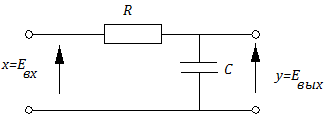
<center>Рис. 2.1</center>

<p>
    Напряжение на выходе
    $$
    y = \frac{q}{C}
    $$
    где $q$ &mdash; заряд на конденсаторе.
</p>

Напряжение на входе
$$x = IR + \frac{q}{C} = \dot{q}R + y = RC \dot{y} + y$$

$$ RC \dot{y} +y = x $$

Получено уравнение апериодического звена, где $T = RC,\space k = 1$.

<b>2) L-R цепочка</b>

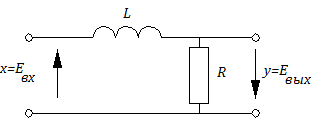
<center>Рис. 2.2</center>

<p>
    Напряжение на выходе
    $$
    y = -IR
    $$
    где $I$ &mdash; сила тока в цепи.
</p>

Напряжение на входе
$$x = IR +L \dot{I} = \frac{L}{R}\dot{y} + y$$

$$ \frac{L}{R} \dot{y} +y = x $$

Получено уравнение апериодического звена, где $T = \frac{L}{R},\space k = 1$.

## Интегрирующие звенья

<p>Главная особенность таких звеньев состотит в том, что дифференциальное уравнение, описывающее процесс, содержит производные от сигнала на выходе и не содержит самого сигнала:
</p>

$$
\sum_{i=1}^{n} T_i \frac{\mathrm{d}^i x}{\mathrm{d} t^i}(t) = 
\sum_{j=0}^{m} k_i \frac{\mathrm{d}^i u}{\mathrm{d} t^i}(t) + k_{m+1}f(t)
$$

Простейшим примером интегрирующего звена является идеально интегрирующее звено:

$$
\dot{x} = ku \tag{3}
$$

<p>Построим для этого звена передаточную, весовую и переходную функции.</p>

Определим уравнение (3)

In [26]:
# левая часть
Left3 = x.diff(t)
# правая часть
Right3 = k*u
# уравнение
dispEq(makelatex(Left3), makelatex(Right3))

<IPython.core.display.Math object>

Применим к обеим частям преобразование Лапласа

In [27]:
LEq3 = LEq(Left3, Right3)
LEq3

Eq(LaplaceTransform(Derivative(x(t), t), t, s), k*LaplaceTransform(u(t), t, s))

Произведём  в полученных символьных выражениях замену в соответствии со свойствами преобразования Лапласа.

In [28]:
#Произведём замену в уравнении и приведём подобные
LEq3 = LSubs(LEq3)
LEq3

Eq(s*LaplaceTransform(x(t), t, s), k*LaplaceTransform(u(t), t, s))

Решим уравнение относительно $L \left[ x(t) \right]$:

In [29]:
Sol3 = LSolve(LEq3)
dispEq(makelatex(L(x)), makelatex(Sol3))

<IPython.core.display.Math object>

Найдём передаточную функцию идеально интегрирующего звена $\mathsf{H}_{(3)}(s)$:


In [30]:
H3 = H(Sol3)
dispEq('\mathsf{H}_{(3)}(s)',makelatex(H3))

<IPython.core.display.Math object>

<p>
Найдём весовую функцию, учитывая, что $\mathcal{L}\left[\delta(t)\right](s) \equiv 1$ и, следовательно, $\mathsf{X}(s) \equiv \mathsf{H}(s)$.
Построим её график.
</p>

In [31]:
h3 = h(H3)
dispEq('h_{(3)}(t)', makelatex(h3))

<IPython.core.display.Math object>

<p>Весовая функция идеально инегрирующего звена представляет собой функцию Хевисайда, умноженную на коэффициент передачи.</p>



<p>
    Найдём переходную функцию, учитывая, что $\mathcal{L}\left[\theta(t)\right](s) = \frac{1}{s}$:
</p>

In [32]:
pi3 = pi(H3)
dispEq('\pi_{(3)}(t)',makelatex(pi3)) 

<IPython.core.display.Math object>

<p>
    Построим её график при целых значениях $k\in [1,5]$:
</p>

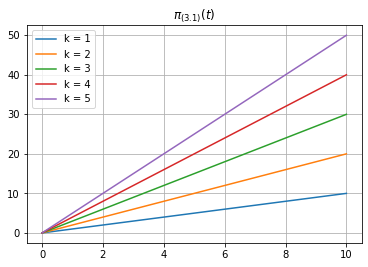

In [33]:
N = 6
subs_list = [{k:i} for i in range(1,N)]
labels = ['k = '+str(i) for i in range(1,N)]
ls = np.linspace(0.0001, 10)
fig, ax = plt.subplots()
ax.set_title('$\pi_{(3.1)}(t)$')
plot_sym(pi3, subs_list, ax, ls, labels)


#### Физичные примеры идеально интегрирующего звена

Примерами идеально интегрирующего звена являются интегрирующие R-L или R−C цепочки:

<b>1) интегрирующая R-C цепочка</b>

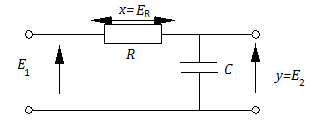
<center>Рис. 3.1</center>

В этой цепочке входное напряжение подаётся на сопротивление, а выходное снимается с ёмкости.

<p>
    Напряжение на выходе
    $$
    y = \frac{q}{C}
    $$
    где $q$ &mdash; заряд на конденсаторе.
</p>

Напряжение на входе:
$$x = IR = \dot{q}R = RC \dot{y}$$

$$ \dot{y} = \frac{x}{RC} $$

Получено уравнение идеально интегрирующего звена, где $k = \frac{1}{RC}$.

Такой же результат может быть получен при $x = E_{1}$ и $RC\dot{y} \gg y$:

$$ RC \dot{y} +y = x  \Rightarrow RC\dot{y} = x$$

<b>2) интегрирующая L-R цепочка</b>

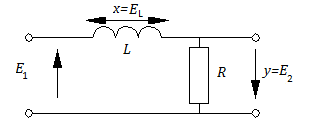
<center>Рис. 3.2</center>

В этой цепочке входное напряжение подаётся на индуктивность, а выходное снимается с сопротивления.

<p>
    Напряжение на выходе
    $$
    y = -IR
    $$
    где $I$ &mdash; сила тока в цепи.
</p>

напряжение на входе:
$$x = - L \dot{I} = \frac{L}{R}\dot{y}$$

$$ \dot{y}=  \frac{R}{L}x $$

Получено уравнение идеально интегрирующего звена, где $ k = \frac{R}{L}$.


Такой же результат может быть получен при $x = E_{вх}$ и $\frac{L}{R}\dot{y} \gg y$:

$$ \frac{L}{R} \dot{y} +y = x  \Rightarrow \frac{L}{R}\dot{y} = x$$

## Дифференцирующие звенья

<p>Звенья такого типа описываются уравнением вида (1) с $k_0 = 0:$
</p>

$$
\sum_{i=0}^{n} T_i \frac{\mathrm{d}^i x}{\mathrm{d} t^i}(t) = 
\sum_{j=1}^{m} k_i \frac{\mathrm{d}^i u}{\mathrm{d} t^i}(t) + k_{m+1}f(t)
$$

Простейшим примером дифференцирующего звена является идеально дифференцирующее звено:

$$
x = k\dot{u} \tag{4}
$$

<p>Построим для этого звена передаточную, весовую и переходную функции.</p>

Определим уравнение (4)

In [34]:
# левая часть
Left4 = x
# правая часть
Right4 = k*u.diff(t)
# уравнение
dispEq(makelatex(Left4), makelatex(Right4))

<IPython.core.display.Math object>

Применим к обеим частям преобразование Лапласа

In [35]:
LEq4 = LEq(Left4, Right4)
LEq4

Eq(LaplaceTransform(x(t), t, s), k*LaplaceTransform(Derivative(u(t), t), t, s))

Произведём  в полученных символьных выражениях замену в соответствии со свойствами преобразования Лапласа.

In [36]:
#Произведём замену в уравнении и приведём подобные
LEq4 = LSubs(LEq4)
LEq4

Eq(LaplaceTransform(x(t), t, s), k*s*LaplaceTransform(u(t), t, s))

Решим уравнение относительно $L \left[ x(t) \right]$:

In [37]:
Sol4 = LSolve(LEq4)
dispEq(makelatex(L(x)), makelatex(Sol4))

<IPython.core.display.Math object>

Найдём передаточную функцию идеально дифференцирующего звена $\mathsf{H}_{(4)}(s)$:


In [38]:
H4 = H(Sol4)
dispEq('\mathsf{H}_{(4)}(s)',makelatex(H4))

<IPython.core.display.Math object>

<p>
Найдём весовую функцию идеально дифференцирующего звена, учитывая, что $\mathcal{L}\left[\delta(t)\right](s) \equiv 1$ и, следовательно, $\mathsf{X}(s) \equiv \mathsf{H}(s)$.
</p>

In [39]:
h4 = h(H4)
dispEq('h_{(4)}(t)', makelatex(h4))


<IPython.core.display.Math object>

Так как $\mathcal{L}^{-1}[s](t) = \delta'(t)$, весовая функция идеально дифференцирующего звена

$$h_{(4.1)} = k \delta'(t)$$

где $\delta'(t-a)$ определяется равенством

$$
\int_{-\infty}^{+\infty} f(t)\delta'(t-a) dt = - \int_{-\infty}^{+\infty} f'(t) \delta(t-a) dt = -f'(a)
$$



<p>
    Найдём переходную функцию идеально дифференцирующего звена, учитывая, что $\mathcal{L}\left[\theta(t)\right](s) = \frac{1}{s}$:
</p>

In [40]:
pi4 = pi(H4)
dispEq('\pi_{(4)}(t)',makelatex(pi4)) 

<IPython.core.display.Math object>

<p>
    Переходная функция идеально дифференцирующего звена представляет собой дельта-фукнкцию, умноженную на коэффициент передачи $k$.
</p>

#### Физичные примеры идеально дифференцирующего звена

Примерами идеально дифференцирующего звена являются дифференцирующие R-L или R−C цепочки:

<b>1) дифференцирующая R-C цепочка</b>

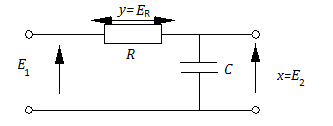
<center>Рис. 4.1</center>

В этой цепочке входное напряжение подаётся на ёмкость, а выходное снимается с сопротивления.

<p>
    Напряжение на входе:
$$ x = \frac{q}{C}$$
   
 где $q$ &mdash; заряд конденсатора.
</p>

Напряжение на выходе
$$
y = IR = \dot{q}R = RC \dot{x}
$$
где $I$ &mdash; сила тока в цепи. 
$$ y = RC\dot{x}$$

Получено уравнение идеально дифференцирующего звена, где $k = RC$.

Такой же результат может быть получен при $y = E_{1}$ и $RC\dot{x} \gg x$:

$$ RC \dot{x} +x = y  \Rightarrow RC\dot{x} = y$$

<b>2) дифференцирующая L-R цепочка</b>

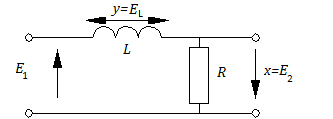
<center>Рис. 4.2</center>

В этой цепочке входное напряжение подаётся на сопротивление, а выходное снимается с индуктивности.

<p>
    Напряжение на выходе
    $$
    y = -IR
    $$
    где $I$ &mdash; сила тока в цепи.
</p>

напряжение на индуктивности:
$$x = L \dot{I} = \frac{L}{R}\dot{y}$$

$$ \dot{y}=  \frac{R}{L}x $$

Получено уравнение идеально дифференцирующего звена, где $ k = \frac{R}{L}$.


Такой же результат может быть получен при $x = E_{вх}$ и $\frac{L}{R}\dot{y} \gg y$:

$$ \frac{L}{R} \dot{y} +y = x  \Rightarrow \frac{L}{R}\dot{y} = x$$